In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# get the recent 5, 8, 11, 14, 17, and 20 years of Shanghai-Shenzhen 300 index data
pro = ts.pro_api()
df = pro.index_daily(ts_code='000300.SH', start_date='20140813', end_date='20190813')
df.to_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-5yr.csv")

df = pro.index_daily(ts_code='000300.SH', start_date='20110813', end_date='20190813')
df.to_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-8yr.csv")

df = pro.index_daily(ts_code='000300.SH', start_date='20080813', end_date='20190813')
df.to_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-11yr.csv")

df = pro.index_daily(ts_code='000300.SH', start_date='20050813', end_date='20190813')
df.to_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-14yr.csv")

In [3]:
## Initializing with 1st buy
def first_buy(data, buy_value, buy_charge, annual_manage_charge):
    # set the fund net value on 20140813 is 1 Yuan
    net_value=1 
    
    # shares to hold after 1st buy
    shares = buy_value*(1-buy_charge)/net_value
    
    # total fund value to hold after 1st buy
    total_value=shares*net_value
    
    # total cost for 1st buy
    total_cost = buy_value
    
    # earning ratil after 1st buy
    earning_ratio = total_value/total_cost-1
    
    # management charge per day
    # no management charge for 1st day
    manage_charge = annual_manage_charge/360
    
    status = pd.DataFrame({'buy_No.':[1],
                       'date':[data.iloc[0]['trade_date']],
                       'index_value':[data.iloc[0]['close']],
                       'buy_value':[buy_value],
                       'shares':[shares],
                       'net_value':[net_value],
                       'total_shares':[shares],
                      'total_value':[total_value],
                      'total_cost': [total_cost],
                      'earning_ratio':[earning_ratio]})
    return status

In [4]:
## Simulate status after every buy in with specified period
def buy_in(data, status, buy_value, period, i, buy_charge, annual_manage_charge):
    daliy_manage_charge = annual_manage_charge/360
    net_value = (data.iloc[(i-1)*period-1]['close']/data.iloc[(i-2)*period]['close']*status.iloc[i-2]['net_value'])*(1-daliy_manage_charge*period)
    shares = buy_value*(1-buy_charge)/net_value
    
    total_shares = status.iloc[i-2]['total_shares'] + shares
    total_value = total_shares * net_value
    total_cost = status.iloc[i-2]['total_cost'] + buy_value
    earning_ratio = total_value/total_cost-1
    
    status = pd.concat([status,(pd.DataFrame({'buy_No.':[i],
                                       'date':[data.iloc[(i-1)*period-1]['trade_date']],
                                       'index_value':[data.iloc[(i-1)*period-1]['close']],
                                       'buy_value':[buy_value], 
                                       'shares':[shares],
                                       'net_value':[net_value], 
                                        'total_shares':[total_shares],
                                       'total_value':[total_value],
                                       'total_cost': [total_cost],
                                       'earning_ratio':[earning_ratio]}))], ignore_index=True)
    
    return status

In [5]:
# calculate the index_increase at each buy in date based on the first trading date
def compute_index_increase(status):
    index_increase_base = []
    for i in status.index.to_list():
        index_increase_base.append(status.iloc[0]['index_value'])

    status['index_increase_base'] = index_increase_base
    status['index_increase'] = status['index_value'] / status['index_increase_base'] - 1
    return status

In [6]:
# Set initial parameter
# Buy 1000 Yuan per month
buy_value = 1000

#Buy in commission charge
buy_charge=0.0015

# Annual manage charge
annual_manage_charge = 0.006


In [7]:
# Read recent 5 years data and 10 years data
df1 = pd.read_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-5yr.csv")
df1.sort_values('trade_date', ascending=True, inplace=True)
df1.reset_index(inplace=True)

df2 = pd.read_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-8yr.csv")
df2.sort_values('trade_date', ascending=True, inplace=True)
df2.reset_index(inplace=True)

df3 = pd.read_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-11yr.csv")
df3.sort_values('trade_date', ascending=True, inplace=True)
df3.reset_index(inplace=True)

df4 = pd.read_csv("D:\Kevin\Personal\github\A-share-data-analysis\hs300-index-recent-14yr.csv")
df4.sort_values('trade_date', ascending=True, inplace=True)
df4.reset_index(inplace=True)

In [8]:
# Strategy 1
# keep buying every 30 trading days with the same amount and no sell out

In [9]:
# simulation with recent 5 years data
status1 = first_buy(df1, buy_value=buy_value, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

for i in range(2, math.floor(len(df1)/30+1)):
    status1 = buy_in(df1, status1, buy_value=1000, period=30, i=i, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

status1 = compute_index_increase(status1)

In [10]:
# simulation with recent 8 years data
status2 = first_buy(df2, buy_value=buy_value, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

for i in range(2, math.floor(len(df2)/30+1)):
    status2 = buy_in(df2, status2, buy_value=1000, period=30, i=i, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

status2 = compute_index_increase(status2)

In [11]:
# simulation with recent 11 years data
status3 = first_buy(df3, buy_value=buy_value, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

for i in range(2, math.floor(len(df3)/30+1)):
    status3 = buy_in(df3, status3, buy_value=1000, period=30, i=i, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

status3 = compute_index_increase(status3)

In [20]:
# simulation with recent 14 years data
status4 = first_buy(df4, buy_value=buy_value, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

for i in range(2, math.floor(len(df4)/30+1)):
    status4 = buy_in(df4, status4, buy_value=1000, period=30, i=i, buy_charge=buy_charge, annual_manage_charge=annual_manage_charge)

status4 = compute_index_increase(status4)

,buy_No.,date,index_value,buy_value,shares,net_value,total_shares,total_value,total_cost,earning_ratio,index_increase_base,index_increase
35,36,20181130,3172.6900,1000,851.931543,1.172043,26175.767258,30679.112433,36000.0,-0.147802,2358.901,0.344987
36,37,20190115,3127.9904,1000,888.588432,1.123692,27064.355690,30412.008733,37000.0,-0.178054,2358.901,0.326037
37,38,20190305,3816.0132,1000,728.895394,1.369881,27793.251084,38073.448435,38000.0,0.001933,2358.901,0.617708
38,39,20190417,4087.2398,1000,686.590110,1.454288,28479.841194,41417.901310,39000.0,0.061997,2358.901,0.732688
39,40,20190603,3632.0127,1000,770.163951,1.296477,29250.005146,37921.964650,40000.0,-0.051951,2358.901,0.539705


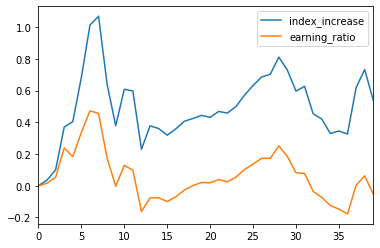

In [13]:
%matplotlib inline
status1[['index_increase', 'earning_ratio']].plot()
status1.iloc[-5:]

,buy_No.,date,index_value,buy_value,shares,net_value,total_shares,total_value,total_cost,earning_ratio,index_increase_base,index_increase
59,60,20181123,3143.4752,1000,810.856829,1.231413,57956.498920,71368.411874,60000.0,0.189474,2917.883,0.077314
60,61,20190108,3047.7035,1000,836.161671,1.194147,58792.660591,70207.082748,61000.0,0.150936,2917.883,0.044491
61,62,20190226,3684.6935,1000,698.943141,1.428585,59491.603732,84988.839396,62000.0,0.370788,2917.883,0.262797
62,63,20190410,4085.8470,1000,629.556874,1.586036,60121.160605,95354.337917,63000.0,0.513561,2917.883,0.400278
63,64,20190527,3637.1971,1000,692.280757,1.442334,60813.441363,87713.287661,64000.0,0.370520,2917.883,0.246519


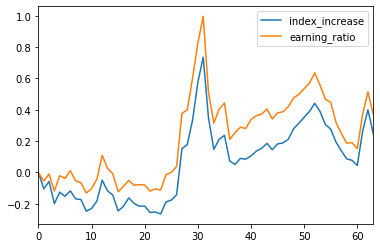

In [14]:
status2[['index_increase', 'earning_ratio']].plot()
status2.iloc[-5:]

,buy_No.,date,index_value,buy_value,shares,net_value,total_shares,total_value,total_cost,earning_ratio,index_increase_base,index_increase
84,85,20181220,3067.4169,1000,707.589449,1.411129,69788.061151,98479.957822,85000.0,0.158588,2444.672,0.254736
85,86,20190211,3306.4725,1000,648.618831,1.539425,70436.679982,108431.981260,86000.0,0.260837,2444.672,0.352522
86,87,20190325,3742.8252,1000,577.424452,1.729231,71014.104434,122799.758561,87000.0,0.411491,2444.672,0.531013
87,88,20190510,3730.4513,1000,573.065447,1.742384,71587.169881,124732.331162,88000.0,0.417413,2444.672,0.525952
88,89,20190624,3841.2659,1000,547.598529,1.823416,72134.768409,131531.701597,89000.0,0.477884,2444.672,0.571281


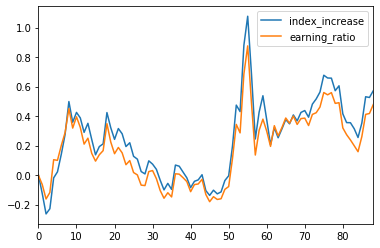

In [15]:
status3[['index_increase', 'earning_ratio']].plot()
status3.iloc[-5:]

,buy_No.,date,index_value,buy_value,shares,net_value,total_shares,total_value,total_cost,earning_ratio,index_increase_base,index_increase
108,109,20181207,3181.5646,1000,292.325122,3.415717,40181.800995,137249.675977,109000.0,0.259171,954.502,2.333219
109,110,20190122,3143.3171,1000,292.605902,3.412440,40474.406897,138116.473637,110000.0,0.255604,954.502,2.293149
110,111,20190312,3755.3519,1000,244.863998,4.077774,40719.270894,166043.977012,111000.0,0.495892,954.502,2.934357
111,112,20190424,4030.0887,1000,226.391356,4.410504,40945.662250,180591.010896,112000.0,0.612420,954.502,3.222190
112,113,20190611,3719.2759,1000,240.057342,4.159423,41185.719592,171308.824146,113000.0,0.516007,954.502,2.896562


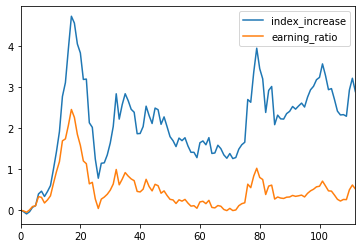

In [21]:
status4[['index_increase', 'earning_ratio']].plot()
status4.iloc[-5:]

In [28]:
def compute_deviation(status):
    deviation = status.iloc[-1]['earning_ratio'] - status.iloc[-1]['index_increase']
    return deviation

In [39]:
d1 = compute_deviation(status1)
d2 = compute_deviation(status2)
d3 = compute_deviation(status3)
d4 = compute_deviation(status4)


print("%i. Use last %i years data, index inceased by %f, but earning ratio is %f, the deviation (earning - index) is %f." 
      % (1, 5, status1.iloc[-1]['index_increase'], status1.iloc[-1]['earning_ratio'], d1))
print("%i. Use last %i years data, index inceased by %f, but earning ratio is %f, the deviation (earning - index) is %f." 
      % (2, 8, status2.iloc[-1]['index_increase'], status2.iloc[-1]['earning_ratio'], d2))
print("%i. Use last %i years data, index inceased by %f, but earning ratio is %f, the deviation (earning - index) is %f." 
      % (3, 11, status3.iloc[-1]['index_increase'], status3.iloc[-1]['earning_ratio'], d3))
print("%i. Use last %i years data, index inceased by %f, but earning ratio is %f, the deviation (earning - index) is %f." 
      % (4, 14, status4.iloc[-1]['index_increase'], status4.iloc[-1]['earning_ratio'], d4))

1. Use last 5 years data, index inceased by 0.539705, but earning ratio is -0.051951, the deviation (earning - index) is -0.591656.
2. Use last 8 years data, index inceased by 0.246519, but earning ratio is 0.370520, the deviation (earning - index) is 0.124001.
3. Use last 11 years data, index inceased by 0.571281, but earning ratio is 0.477884, the deviation (earning - index) is -0.093396.
4. Use last 14 years data, index inceased by 2.896562, but earning ratio is 0.516007, the deviation (earning - index) is -2.380554.


In [41]:
# Conclusion
# 1. Index AIP strategy is highly impacted by invest time and the economy cycle.
# 2. If you started invest at beginging of going-up cycle, you may not able to gain the profit of the index growth later.
# 3. Cycle is more important than inestment time.
# 4. Smart buy in value should make the strategy better.
# 5. Smart sell out timing should make the strategy better